In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson, linregress, kstest
from sklearn.linear_model import LinearRegression
from scipy.special import kl_div

# Strontium-90 Decay

![image.png](https://radioactivity.eu.com/static/bd2ac4b2ed7ce11af31e688bfcadc8b0/d1f95/Diagramme_Strontium_En.jpg)

# Attenuation
$$I = I_0 e^{-\mu d}$$

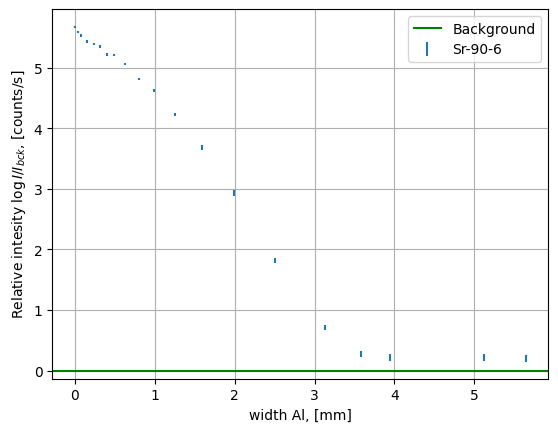

In [46]:
I_background = 0.29 # counts /s

# station 1
# Sr-90-6
measurements = '''
3.13 473 800
2.51 713 400
1.99 544 100
1.59 694 60
1.26 1196 60
0.99 1775 60
0.81 2143 60
0.63 2735 60
0.49 3166 60
0.400 1611 30
0.320 1834 30
0.240 1908 30
0.160 1978 30
0.080 2189 30
0.040 2328 30
0 2522 30
3.94 360 1000
5.12 361 1000
5.64 353 1000
3.58 381 1000
'''
data = np.genfromtxt(measurements.splitlines())
d1, counts, time = data.T
delta = 1/np.sqrt(counts) # relative error
I = counts / time
I_rel1 = I / I_background # relative
I_err = delta * I_rel1
log_I_rel1 = I_err / I_rel1 # error of log

plt.errorbar(d1, np.log(I_rel1), yerr=log_I_rel1, linestyle='', label='Sr-90-6')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bck}$, [counts/s]')
plt.axhline(0, color='green', label='Background')
plt.grid()
plt.legend();


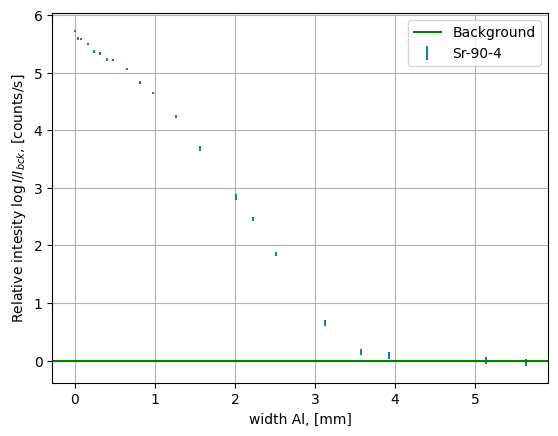

In [45]:
# station 2
# Sr-90-4
measurements = '''
3.12 336 600
2.51 736 400
2.23 676 200
2.02 497 100
1.56 693 60
1.27 1201 60
0.98 1815 60
0.81 2179 60
0.65 2744 60
0.48 3228 60
0.400 1623 30
0.320 1810 30
0.240 1855 30
0.160 2122 30
0.080 2306 30
0.040 2334 30
0     2658 30
3.93 318 1000
5.14 292 1000
5.63 281 1000
3.58 338 1000
'''
data = np.genfromtxt(measurements.splitlines())
d2, counts, time = data.T
delta = 1/np.sqrt(counts) # relative error
I = counts / time
I_rel2 = I / I_background # relative
I_err = delta * I_rel2
log_I_rel2 = I_err / I_rel2 # error of log

plt.errorbar(d2, np.log(I_rel2), yerr=log_I_rel2, linestyle='', label='Sr-90-4')
#plt.errorbar(d1, np.log(I_rel1), yerr=log_I_rel1, linestyle='', label='Sr-90-6')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bck}$, [counts/s]')
plt.axhline(0, color='green', label='Background')
plt.grid()
plt.legend()

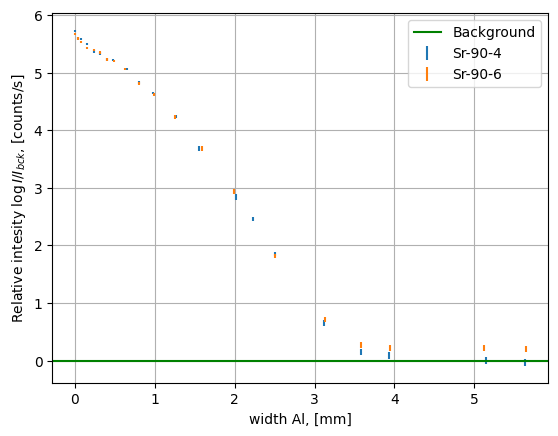

In [47]:
plt.errorbar(d2, np.log(I_rel2), yerr=log_I_rel2, linestyle='', label='Sr-90-4')
plt.errorbar(d1, np.log(I_rel1), yerr=log_I_rel1, linestyle='', label='Sr-90-6')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bck}$, [counts/s]')
plt.axhline(0, color='green', label='Background')
plt.grid()
plt.legend()